<a href="https://colab.research.google.com/github/A-THAKUR22/MarchAssignments/blob/main/March26Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)Plot bar charts showing impact of employee salaries on retentionPlot bar charts showing corelation between department and employee retentionNow build logistic regression model using variables that were narrowed down in step 1Measure the accuracy of the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
#Read the data from csv file
employee_ret=pd.read_csv('HR_comma_sep.csv')
employee_ret

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<Axes: xlabel='satisfaction_level', ylabel='Count'>

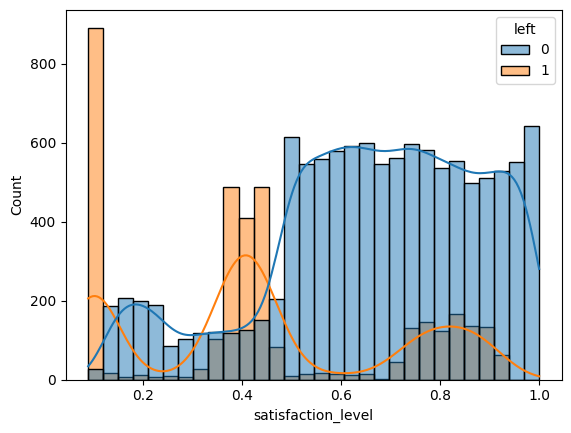

In [ ]:
#Perform EDA
sns.histplot(x='satisfaction_level', hue='left', data=employee_ret, kde=True)

<ipython-input-42-2883eb9b471e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=employee_ret.corr()


<Axes: >

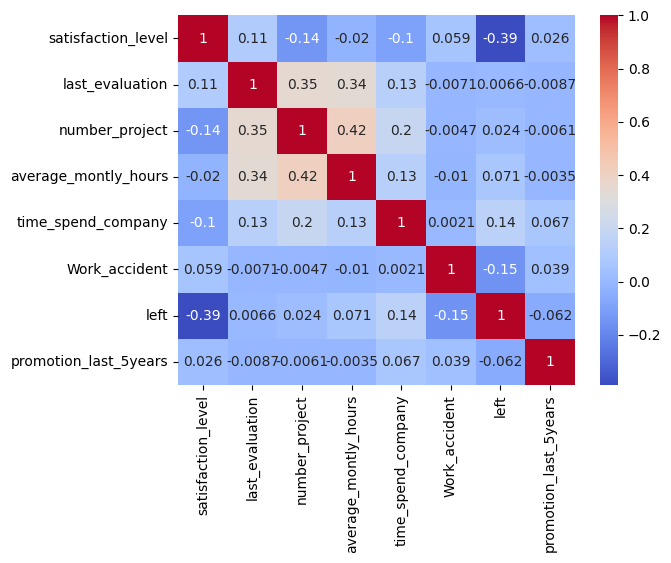

In [ ]:
correlation=employee_ret.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:
#Find correlation between the employees who left with other features
correlation_coefficients = employee_ret.corr()['left'].drop('left')
correlation_coefficients

<ipython-input-102-3e8e0212172a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coefficients = employee_ret.corr()['left'].drop('left')


satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
promotion_last_5years   -0.061788
salary_encoded          -0.001294
Name: left, dtype: float64

In [ ]:
#Peform label encoding on the salary
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
employee_ret['salary_encoded']=encoder.fit_transform(employee_ret['salary'])

In [ ]:
employee_ret

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1
14995,0.37,0.48,2,160,3,0,1,0,support,low,1
14996,0.37,0.53,2,143,3,0,1,0,support,low,1
14997,0.11,0.96,6,280,4,0,1,0,support,low,1


In [ ]:
#New correlation with encoded_salary
correlation_coefficients = employee_ret.corr()['left'].drop('left')
correlation_coefficients

<ipython-input-105-8893e3d3abdf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coefficients = employee_ret.corr()['left'].drop('left')


satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
promotion_last_5years   -0.061788
salary_encoded          -0.001294
Name: left, dtype: float64

<Axes: xlabel='Department', ylabel='left'>

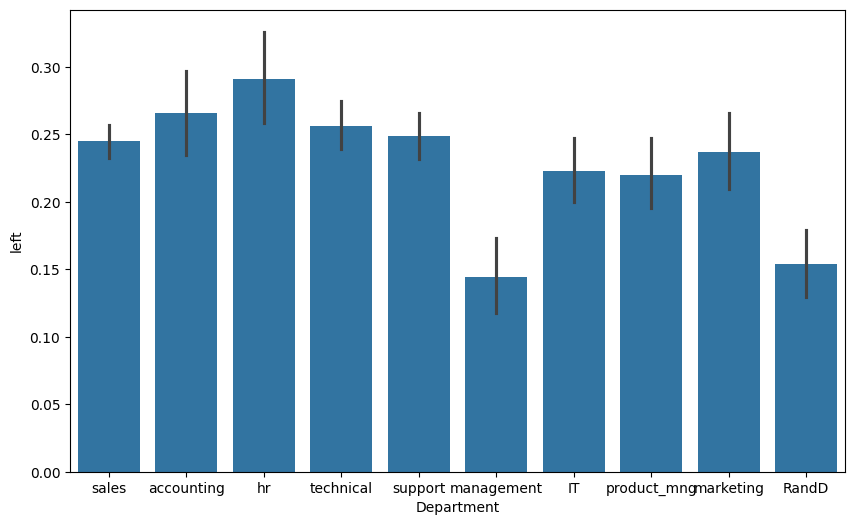

In [ ]:
#Barplot betwwen left employees variable and Department
plt.figure(figsize=(10, 6))
sns.barplot(x='Department',y='left',data=employee_ret)

<Axes: xlabel='left', ylabel='salary_encoded'>

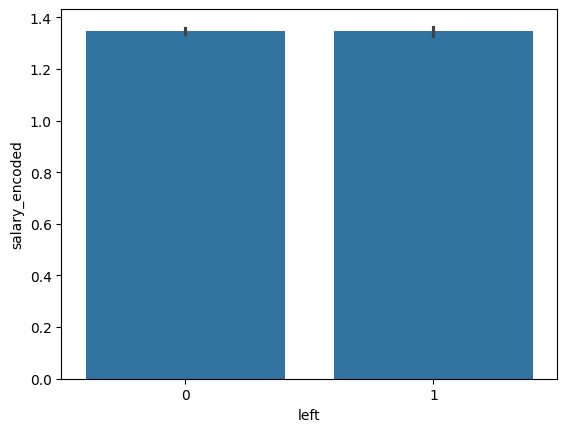

In [ ]:
#Barplot between left employees variable and the salary(encoded) they had
sns.barplot(x='left',y='salary_encoded',data=employee_ret)

In [ ]:
#Dividing the data in features X from the target variable
X=employee_ret[['satisfaction_level','number_project','average_montly_hours','Work_accident','promotion_last_5years']]
y=employee_ret['left']

In [ ]:
X

,satisfaction_level,number_project,average_montly_hours,Work_accident,promotion_last_5years
0,0.38,2,157,0,0
1,0.80,5,262,0,0
2,0.11,7,272,0,0
3,0.72,5,223,0,0
4,0.37,2,159,0,0
...,...,...,...,...,...
14994,0.40,2,151,0,0
14995,0.37,2,160,0,0
14996,0.37,2,143,0,0
14997,0.11,6,280,0,0


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
#Splitting the data in training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=149)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Make predictions
y_predict=model.predict(X_test)
print(f'The predictions are: {y_predict}')

The predictions are: [0 0 0 ... 0 0 0]


In [ ]:
#Measuring the accuracy of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy=accuracy_score(y_test,y_predict)
Precision=precision_score(y_test,y_predict)
Recall=recall_score(y_test,y_predict)
F1=f1_score(y_test,y_predict)
Roc=roc_auc_score(y_test,y_predict)

print(f'Accuracy:{Accuracy}')
print(f'Precision Score:{Precision}')
print(f'Recall Score:{Recall}')
print(f'F1 Score:{F1}')
print(f'Roc and Auc Score:{Roc}')

Accuracy:0.7796666666666666
Precision Score:0.5321428571428571
Recall Score:0.21944035346097202
F1 Score:0.310740354535975
Roc and Auc Score:0.5814995821591805
